## Proyecto Redes Neuronales. Compración Perceptrón simple vs Perceptrón multicapa en  clasificación

Según los CDC, las enfermedades del corazón son una de las principales causas de muerte. Aproximadamente la mitad de los estadounidenses (47%) presentan al menos uno de los tres factores de riesgo clave de las enfermedades cardíacas: presión arterial alta, colesterol alto y tabaquismo. Otros indicadores clave son la condición de diabético, la obesidad (IMC elevado), la falta de actividad física o el consumo excesivo de alcohol. Detectar y prevenir los factores que más influyen en las enfermedades del corazón es muy importante en la asistencia sanitaria. Los avances informáticos, por su parte, permiten aplicar métodos de aprendizaje automático para detectar "patrones" a partir de los datos que puedan predecir el estado de un paciente.

En este proyecto vas a **comparar la eficacia de dos métodos diferentes en la predicción del riesgo de padecer una enfermedad cardiaca**. 

El conjunto de datos procede de los CDC y es una parte importante del Sistema de Vigilancia de los Factores de Riesgo en el Comportamiento, que realiza encuestas telefónicas anuales para recopilar datos sobre el estado de salud de los residentes en EE.UU. El dataset original tiene casi 300 variables, pero se ha reducido a sólo unas 20 variables. 

Tienes que realizar las siguientes tareas:
    - Crear una función perceptron simple que dado un ejemplo o conjunto de ejemplos devuelva la clase predicha (-1, 1).
    - Crear una función para calcular el coste 'bisagra' para medir el error en clasificación.
    - Crear una función que calcule el gradiente de la función de coste por cada variable del perceptrón.
    - Programar el algortimo del descenso con gradiente y obtener los parámetros del perceptrón que mejor se ajusten a los datos de entrenamiento.
    - Calcular la matriz de confusión en los ejemplos de test.
    - Utilizando la librería sklearn entrenar 2 arquitecturas diferentes de redes neuronales.
    - Comparar las matrices de confusión de las Redes Neuronales con al obtenida por el perceptrón.

En la siguiente celda se leen los datos y se generan los conjuntos de entrenamiento y de test.

In [1]:
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np

datos = pd.read_csv("heart_2020.csv")
datos = datos.drop(['Unnamed: 0'], axis=1)
datos = shuffle(datos)
datos.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,BMI,PhysicalHealth,MentalHealth,SleepTime
39653,1,0,0,0,1,1,12,5,2,1,2,0,0,0,29.16,6.0,3.0,8.0
10324,0,0,0,0,0,1,9,5,2,1,1,0,0,0,38.39,0.0,0.0,7.0
45923,1,1,0,0,0,1,11,5,0,1,4,0,0,1,29.16,0.0,0.0,7.0
14949,0,1,0,0,0,0,4,5,0,0,4,1,0,0,39.48,0.0,7.0,6.0
18300,0,0,0,0,0,0,10,5,0,1,4,0,1,0,23.03,0.0,0.0,8.0


In [2]:
datos.describe()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,BMI,PhysicalHealth,MentalHealth,SleepTime
count,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.456217,0.49335,0.060150,0.087117,0.229700,0.523233,7.620233,4.611650,0.458683,0.719467,2.231617,0.149533,0.073217,0.127967,28.971355,5.141217,4.201083,7.118750
std,0.498083,0.49996,0.237767,0.282008,0.420643,0.499464,3.413152,1.024753,0.838951,0.449264,1.396139,0.356616,0.260494,0.334055,6.541266,9.761226,8.466793,1.571938
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.210000,0.000000,0.000000,1.000000
25%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,24.410000,0.000000,0.000000,6.000000
50%,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,8.000000,5.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,27.920000,0.000000,0.000000,7.000000
75%,1.000000,1.00000,0.000000,0.000000,0.000000,1.000000,10.000000,5.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,32.280000,4.000000,3.000000,8.000000
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,12.000000,5.000000,3.000000,1.000000,4.000000,1.000000,1.000000,1.000000,93.970000,30.000000,30.000000,24.000000


In [3]:
# Tratamiento previo de los datos

from sklearn.model_selection import train_test_split
# Ten en cuenta que la variable y tiene valores (0 y 1)
y = np.array(datos['HeartDisease'])
datos = datos.drop(['HeartDisease'], axis=1)
X = np.array(datos)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 2)


In [4]:
y_test_0 = y_test.copy()
y_test_0[y_test_0 == 0] = -1
print(y_test_0)

y_train_0 = y_train.copy()
y_train_0[y_train_0 == 0] = -1
print(y_train_0)

[-1 -1 -1 ... -1 -1 -1]
[ 1 -1  1 ... -1  1  1]


In [5]:
X_train = np.concatenate((np.ones((X_train.shape[0],1)), X_train), axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0],1)), X_test), axis=1)

In [6]:
w_ini = np.random.rand(X_train.shape[1])

La librería sklearn tiene implementada una clase MLPClassifier que es un perceptrón multicapa con el algoritmo de backpropagation que podemos utilizar en la siguiente celda se crea un preceptrón con una capa oculta y dos neuronas para que se ajuste a la función XOR.
Para ayuda sobre la clase y sus parámetros visitar: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [7]:
X = np.array([[2,2], [0,0], [2,0], [0,2]])
y = np.array([1, 1, 0, 0])

In [8]:
from sklearn.neural_network import MLPClassifier
# Función para crear el perceptrón multicapa
pmc = MLPClassifier(solver='lbfgs', alpha=1e-2, hidden_layer_sizes=(2,), activation='logistic', random_state=1)
# Al llamar a fit se realiza el entrenamiento
pmc.fit(X, y)

y_p = pmc.predict(X)

#Valores predichos
print(y_p)
# Valores de los pesos de la red
print(pmc.coefs_)
# Valores de los pesos correspondiente a los bias (x_0)
print(pmc.intercepts_)

[1 1 0 0]
[array([[ 2.91909169,  2.9104891 ],
       [-2.91417536, -2.90756563]]), array([[-6.03085153],
       [ 6.03663923]])]
[array([-3.31110633,  3.29351111]), array([-3.02922772])]


In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y, y_p)
print(cm)

[[2 0]
 [0 2]]


In [11]:
#FUNCIÓN PERCEPTRÓN SIEMPRE
import numpy as np
def perceptron(w,x):
    return np.sign(np.dot(x,w))

perceptron([-1, -1], X[0]) #para probarlo

-1

In [12]:
#FUNCIÓN COSTE BISAGRA PARA MEDIR EL ERROR DE CLASIFICACIÓN
def coste_bisagra(X, y, w):
    loss = 0
    wxy = 1-np.multiply(np.dot(X,w),y)
    loss = np.sum(np.maximum(wxy,0))
    loss = loss/len(X)
    return loss

In [13]:
#FUNCIÓN GRADIENTE DE LA FUNCIÓN DE COSTE
def margen(X,y,w):
    return (np.sum(np.multiply(X,w))*y)

def gradientes(X,y,w,alpha):
    resultado = []
    condicion = np.dot(X,w)*y < 1
    for i in range (len(w)):
        nw = 0
        nw = np.dot(-X[:,i]*condicion,y)
        resultado.append(nw/len(X))
    return np.array(resultado)

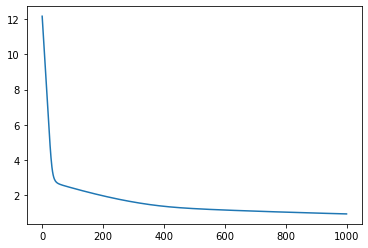

In [14]:
#FUNCIÓN DESCENSO POR GRADIENTE
def descensoGradiente(X, y, w_ini, alpha = 0.001, iters = 1000):
    w = w_ini
    Loss = []
    for i in range(iters):
        w = w-alpha*gradientes(X,y,w,alpha)
        Loss.append(coste_bisagra(X,y,w))
    return Loss, w


import matplotlib.pyplot as plt 

L, w_def = descensoGradiente(X_train, y_train_0, w_ini)
plt.plot(L)
plt.show()

## PERCEPTRÓN INDIVIDUAL

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score

vector =(perceptron(w_def,X_test))
cm = confusion_matrix(y_test_0, vector)
print(cm)

vp = cm[0][0]
vn = cm[1][1]
fp = cm[1][0]
fn = cm[0][1]
    
accuracy = (vp + vn) / (vp + vn + fp + fn)
print("Accuracy:",accuracy)
recall = vp / (vp + fn)
print("Recall:",recall)
precision = vp / (vp + fp)
print("Precision:",precision)
tnr = vn / (vn + fp)
print("TNR:",tnr)

[[4285 2198]
 [1945 3572]]
Accuracy: 0.65475
Recall: 0.660959432361561
Precision: 0.687800963081862
TNR: 0.6474533260830161


## RED NEURONAL CON DESCENSO ESTOCÁSTICO ESTANDAR

In [16]:
from sklearn.neural_network import MLPClassifier
red1_sgd = MLPClassifier(solver='sgd', alpha=1e-1, hidden_layer_sizes=(3,), activation='logistic', random_state=1,max_iter = 10000)

# Al llamar a fit se realiza el entrenamiento
red1_sgd.fit(X_test, y_test)

y_practica1 = red1_sgd.predict(X_test)

confusionMatrix = confusion_matrix(y_test, y_practica1)
print(confusionMatrix)

vp = confusionMatrix[0][0]
vn = confusionMatrix[1][1]
fp = confusionMatrix[1][0]
fn = confusionMatrix[0][1]
    
accuracy = (vp + vn) / (vp + vn + fp + fn)
print("Accuracy:",accuracy)
recall = vp / (vp + fn)
print("Recall:",recall)
precision = vp / (vp + fp)
print("Precision:",precision)
tnr = vn / (vn + fp)
print("TNR:",tnr)

[[4609 1874]
 [1084 4433]]
Accuracy: 0.7535
Recall: 0.710936294925189
Precision: 0.8095907254523098
TNR: 0.8035164038426681


## RED NEURONAL CON DESCENSO ESTOCÁSTICO OPTIMIZADO (ADAM)

In [17]:
# Función para crear el perceptrón multicapa
pmc = MLPClassifier(solver='lbfgs', alpha=1e-2, hidden_layer_sizes=(2,), max_iter = 1000, activation='logistic', random_state=1)
# Al llamar a fit se realiza el entrenamiento
pmc.fit(X_train, y_train)

y_p = pmc.predict(X_test)
from sklearn.neural_network import MLPClassifier
red2_adam = MLPClassifier(solver='adam', alpha=1e-2, hidden_layer_sizes=(2,2), activation='relu', random_state=0,max_iter = 10000)

# Al llamar a fit se realiza el entrenamiento
red2_adam.fit(X_test, y_test)

y_practica2 = red2_adam.predict(X_test)

confusionMatrix = confusion_matrix(y_test, y_practica2)
print(confusionMatrix)

vp = confusionMatrix[0][0]
vn = confusionMatrix[1][1]
fp = confusionMatrix[1][0]
fn = confusionMatrix[0][1]
    
accuracy = (vp + vn) / (vp + vn + fp + fn)
print("Accuracy:",accuracy)
recall = vp / (vp + fn)
print("Recall:",recall)
precision = vp / (vp + fp)
print("Precision:",precision)
tnr = vn / (vn + fp)
print("TNR:",tnr)

[[5099 1384]
 [1536 3981]]
Accuracy: 0.7566666666666667
Recall: 0.7865185870738856
Precision: 0.7685003767897514
TNR: 0.7215878194671017


# CONCLUSIÓN
Los resultados obtenidos por las redes neuronales son 
mejores que los resultados obtenidos por el perceptrón simple.

Por lo que se puede llegar a la conclusión que es mucho más efectivo unir más de un perceptrón formando asi redes neuronales.

Con este ejemplo se está intentando predecir si una persona tendrá  o no un ataque al corazón. Es evidente que es más importante fallar prediciendo que una persona va a tener un ataque cuando no es cierto, que al revés, por lo tato nos tenemos que fijar en el recall. De las personas que van a sufrir un infarto, cuantas se han predicho bien. La segunda red neuronal (descenso estocástico optimizado) tiene un recall del 78% frente a un 71% de la red neuronal con descenso estocástico estandar. Por lo que se puede entender que la primera red neuronal mencionada es mas eficiente para resolver nuestro problema.